# Project 1 - Predicting Active Users on a Website

Time series analysis involves examining datasets that change over time to identify patterns, trends, and seasonal variations. This type of analysis is used in various fields such as finance, economics, and meteorology to forecast future values based on past data.

- Steps Involved in Time Series Analysis:
  
1- Data Collection: The first step is gathering the relevant data over a specified period. This data must be accurate and timely to ensure meaningful analysis.

2- Visualisation: Once collected, the data is visualised using plots and graphs to understand its underlying patterns, trends, and any seasonal variations.

3- Decomposition: The time series data is decomposed into its constituent components: trend, seasonality, and residual (noise). This helps in better understanding the individual elements affecting the data.

4- Stationarity: For accurate modelling, the data must be stationary, meaning its statistical properties (mean, variance) do not change over time. Techniques such as differencing or transformation are used to achieve stationarity if needed.

5- Model Selection: Various models can be applied to time series data, including ARIMA (AutoRegressive Integrated Moving Average), SARIMA (Seasonal ARIMA), and EMA (Exponential Moving Average). The choice of model depends on the characteristics of the data and the specific requirements of the analysis.

6- Parameter Estimation and Validation: Once a model is selected, its parameters need to be estimated and validated. This involves using techniques like cross-validation to ensure the model performs well on unseen data.

7- Forecasting: Using the validated model, future values of the time series are predicted. This is the core purpose of time series analysis and helps in making informed decisions based on the forecasts.

8- Evaluation and Updating: The accuracy of the forecasts is evaluated using metrics such as Mean Absolute Error (MAE) or Root Mean Square Error (RMSE). Based on the evaluation, the model might need to be updated or refined to improve its forecasting accuracy.

> In this project all these steps will be carried out.

In [1]:
!pip install -q -U watermark

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns # to create graphs
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Formatting for Graphs and Tables
plt.style.use('ggplot')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# Formatting the Graphs Label
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'

In [4]:
%reload_ext watermark
%watermark -a "Zelly Irigon"

Author: Zelly Irigon



In [9]:
# Loading data
data = pd.read_csv('dataset.csv', header = None)

In [10]:
# Visualasing the data
data.head()

,0,1
0,2013-01,110
1,2013-02,121
2,2013-03,135
3,2013-04,127
4,2013-05,128


Note that there are two columns. This data represents a univariate series, so there is only one random variable(active_users) and the date, which means the index of the series. The series is monthly.


In [22]:
# Adjusting the name of each column
data.columns = ['month', 'active_users']

In [23]:
# Visualising the data
data.head()

,month,active_users
0,2013-01,110
1,2013-02,121
2,2013-03,135
3,2013-04,127
4,2013-05,128


In [24]:
# Shape
data.shape

(144, 2)

In [25]:
# Data Type
data.dtypes

month           object
active_users     int64
dtype: object

Note that the 'month' column has the type as object(string). I'll need to fix this later

In [26]:
# Object type
type(data)

pandas.core.frame.DataFrame

In [27]:
# Statistical Summary of the active_users variable
# Describe function makes a statistical summary of numeric variables
data.describe()

,active_users
count,144.000000
mean,280.416667
std,119.825543
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [28]:
# Month with the highest number of users
data.max()

month           2024-12
active_users        622
dtype: object

In [29]:
# Collecting the complete period of the time series
print('Start of Period: {}\nEnd of Period: {}'.format(data.month.min(), data.month.max()))

Start of Period: 2013-01
End of Period: 2024-12


### Data Processing and Visualization 


In [30]:
# Visualizing data
data.head()

,month,active_users
0,2013-01,110
1,2013-02,121
2,2013-03,135
3,2013-04,127
4,2013-05,128


In [31]:
data.dtypes

month           object
active_users     int64
dtype: object

In [33]:
# Converting the date column from object to datetime
data['month'] = pd.to_datetime(data['month'], format = '%Y-%m')

In [34]:
data.dtypes

month           datetime64[ns]
active_users             int64
dtype: object

In [35]:
data.head()

,month,active_users
0,2013-01-01,110
1,2013-02-01,121
2,2013-03-01,135
3,2013-04-01,127
4,2013-05-01,128


In [36]:
# Transforming the date column in the index of the dataset. This will be useful later
data_series = data.set_index('month')

In [37]:
data_series.head()

,active_users
month,
2013-01-01,110
2013-02-01,121
2013-03-01,135
2013-04-01,127
2013-05-01,128


Now this dataset can be considered a time series!

In [38]:
# Visualizing index
data_series.index

DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01',
               ...
               '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'], dtype='datetime64[ns]', name='month', length=144, freq=None)

In [39]:
# Are there null values?
data_series.isnull().sum()

active_users    0
dtype: int64

> Time Series Plot - First Trend Analysis

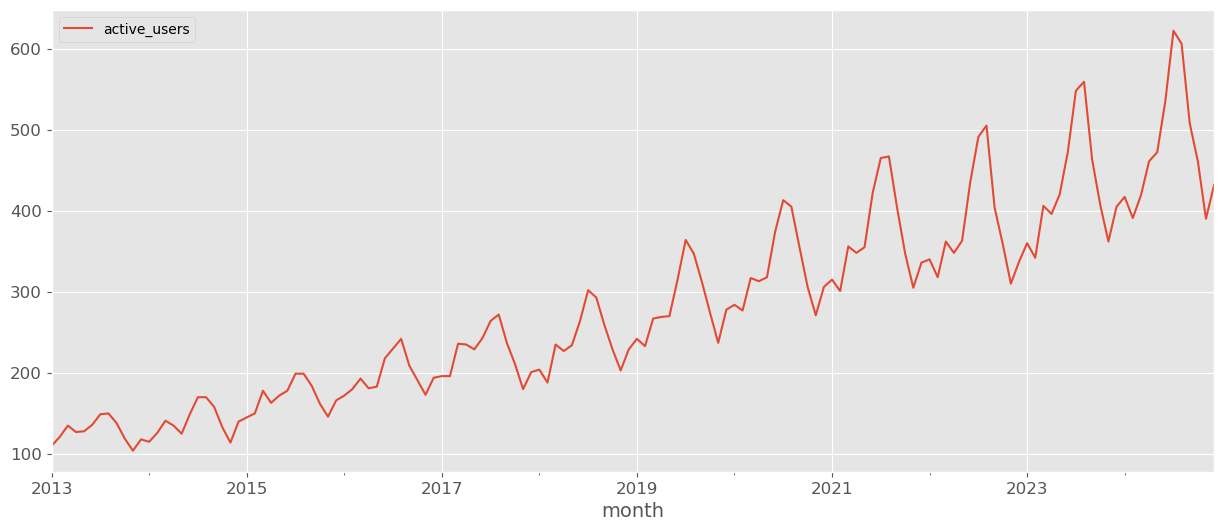

In [40]:
# Time series plot - note the trends
data_series.plot(figsize =(15,6))
plt.show()


The graph above shows two components of the series: Seasonality and Trend.

* Seasonality - The phenomenon repeats at fixed intervals.
* Trend - Over time, the series follows a growth trend.

Another aspect to consider is the cyclical behaviour. This occurs when the pattern of rises and falls in the series does not happen at fixed calendar-based intervals. Care must be taken not to confuse a "cyclical" effect with a "seasonal" effect.

But, how can we differentiate a "cyclical" pattern from a "seasonal" one?

If the patterns do not have fixed calendar-based frequencies, they are cyclical. Unlike seasonality, cyclical effects are typically influenced by business and other socioeconomic factors.

> Density Chart - Second Trend Analysis

Analysis of the density plot of observations can provide more information about the structure of the data.

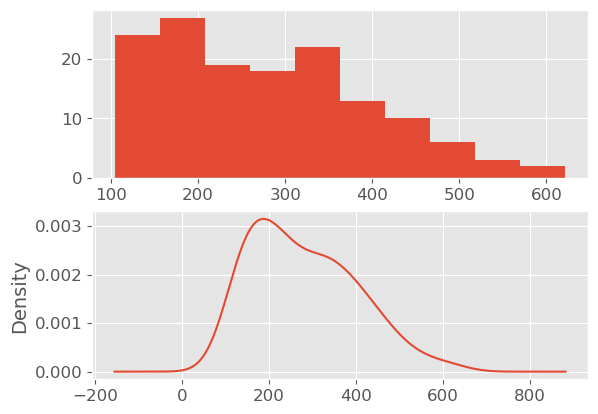

In [42]:
# Density chart

# Plot
plt.figure(1)

# Subplot
plt.subplot(211)
data_series.active_users.hist()

# Subplot 2
plt.subplot(212)
data_series.active_users.plot(kind = 'kde')
plt.show()

Analysis:

* The distribution is not perfectly Gaussian (normal distribution).
* The distribution is skewed to the left.
* Transformations may be useful before modelling.

> BoxPlots - Third Trend Analysis

I'll creat Boxplots for each year of the series

Text(0, 0.5, 'Active Users')

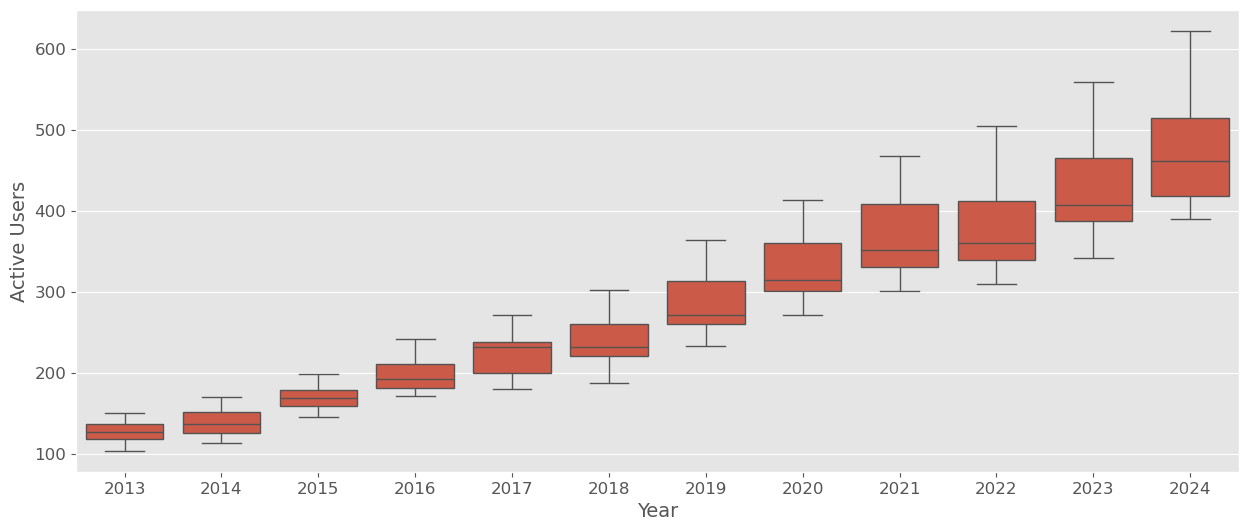

In [48]:
# Defining the plot area for the subplots(the boxplots)
fig, ax = plt.subplots(figsize = (15,6))

# Defining the variables
# This is possible because I changed the month to datetime type and placed it as the data frame index.
year_index = data_series.active_users.index.year
value = data_series.active_users


# Creates a box plot for each year using Seaborn
sns.boxplot(x = year_index, y = value, ax = ax, data = data_series)

plt.xlabel('Year')
plt.ylabel('Active Users')

            


Analysis:

* The increase in the median over the years confirms an upward trend.
* There is a constant increase in the dispersion around the median of the data over time. The boxes are getting progressively larger.
A model considering seasonality may work well for predicting this series.

## Visualizing the Time Series Decomposition

In [50]:
# Multiplicative Decomposition
multiplicative_decomposition = sm.tsa.seasonal_decompose(data_series,
                                                         model = 'multiplicative',
                                                         extrapolate_trend = 'freq')

In [51]:
# Object type
type(multiplicative_decomposition)

statsmodels.tsa.seasonal.DecomposeResult

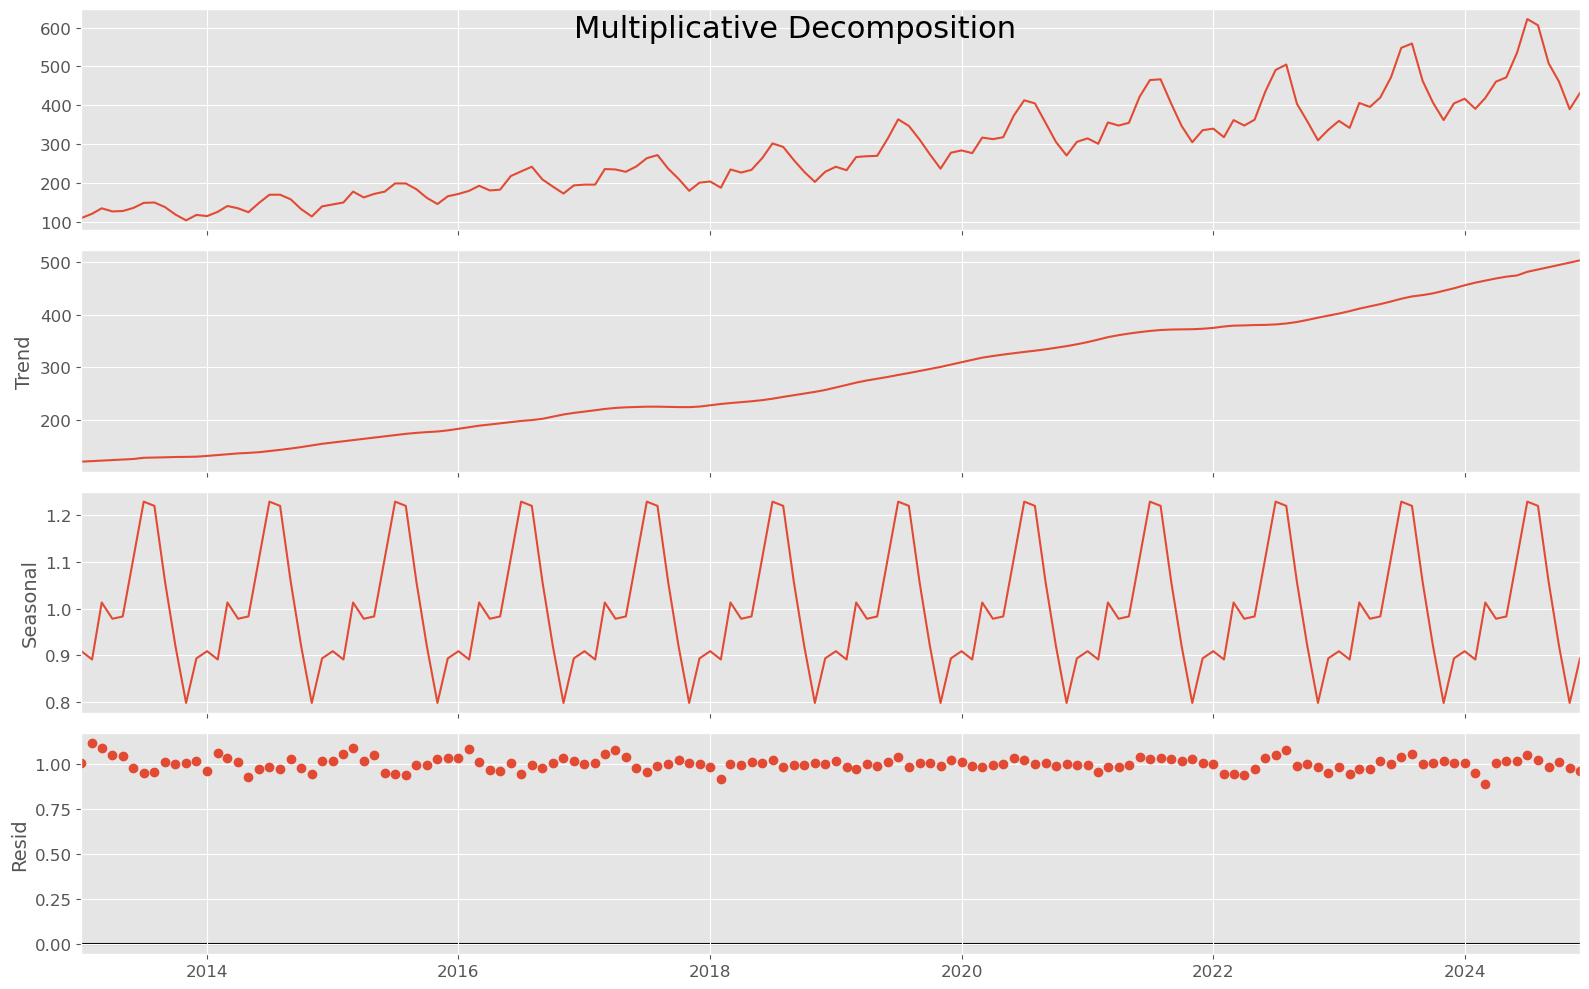

In [52]:
# Plot
plt.rcParams.update({'figure.figsize': (16,10)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize = 22)
plt.show()

In [55]:
# Additive Decomposition
additive_decomposition = sm.tsa.seasonal_decompose(data_series,
                                                   model = 'aditive',
                                                   extrapolate_trend = 'freq')

In [56]:
type(additive_decomposition)

statsmodels.tsa.seasonal.DecomposeResult

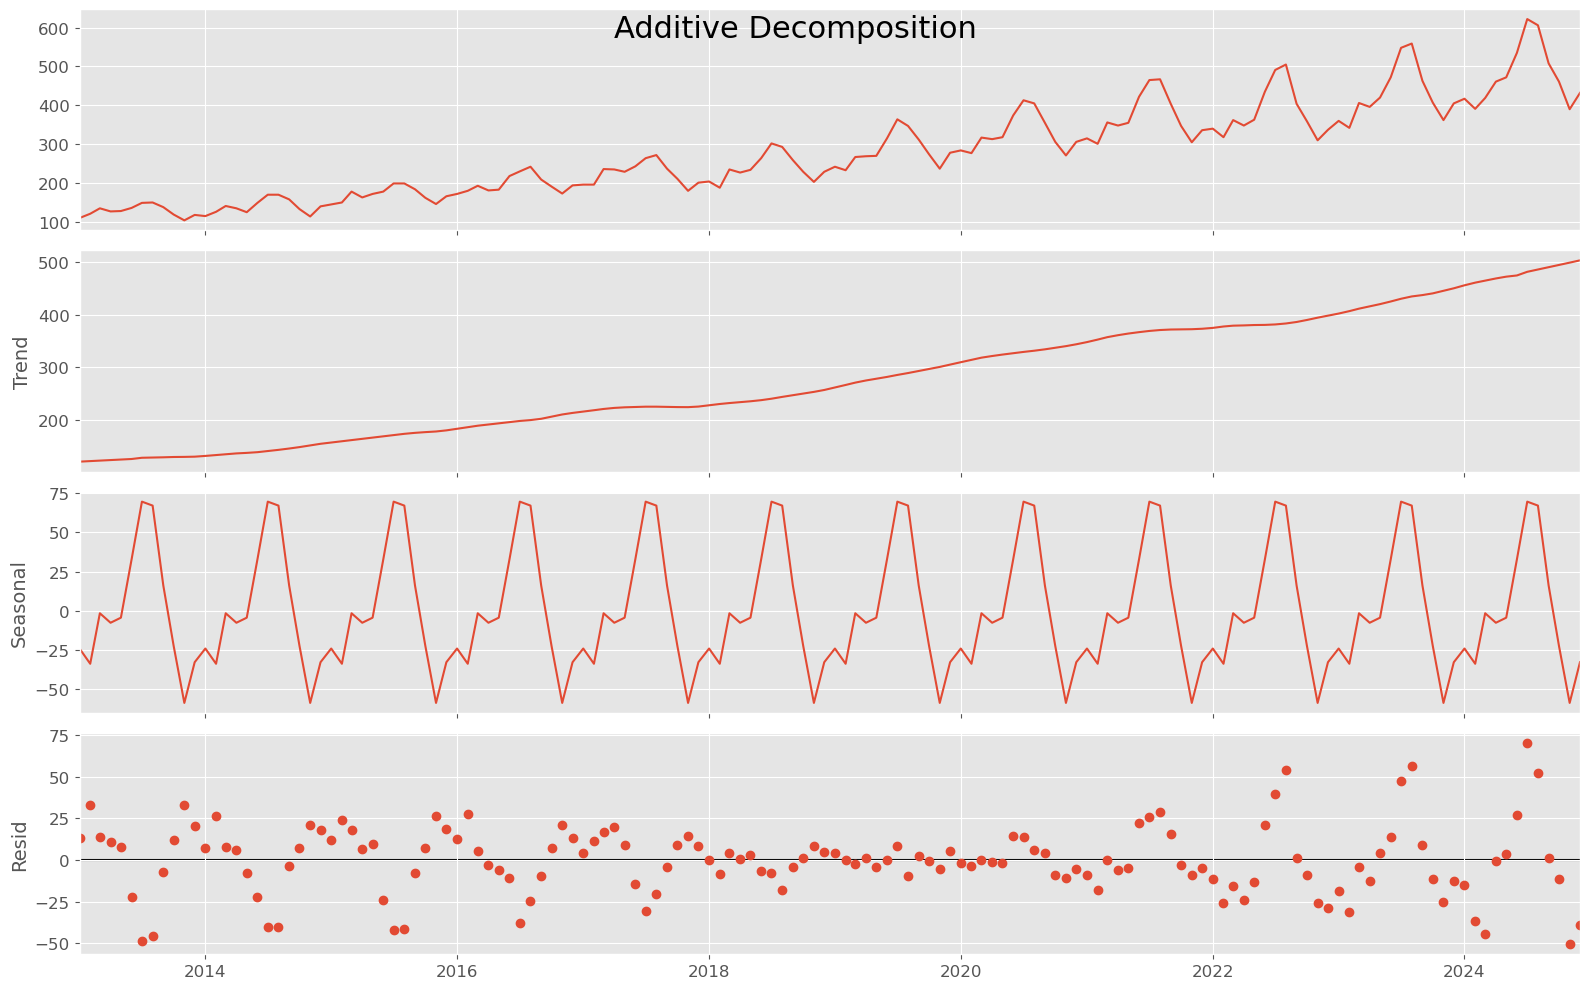

In [58]:
# Plot
plt.rcParams.update({'figure.figsize': (16,10)})
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize = 22)
plt.show()

> Series Decomposition Analysis

In the graph above, we can see the components of the time series:

    1- The first line of the graph shows the observed data, in our example, the number of active users.

    2- The second line shows the trend of the series, which is clearly an upward trend, meaning the number of vehicles produced tends to grow over time.

    3- The third line shows the seasonality. Clearly, we have regular periods of increase and decrease, times when the number of vehicles produced is higher or lower. This might be explained by calendar-based events (summer, winter, school holidays, etc.).

    4- The fourth line is the irregular component or residual.

Setting **extrapolate_trend = 'freq'** removes NaN values in the trend and residuals (if they exist, of course).

If you look closely at the residuals from the additive decomposition, they still have some pattern. The multiplicative decomposition, however, appears quite random, which is good.

Therefore, ideally, the multiplicative decomposition should be preferred for this specific series.

The numerical output of the trend, seasonal components, and residuals are stored in the decomposicao_multiplicativa output itself. Let's extract them and place them in a data table.

## Extraction of Time Series Components

Extraction Rule:

Real values = (seasonal * trend * resid)

In [63]:
# Concatenate the result of the series decomposition 
data_series_rebuilt = pd.concat([multiplicative_decomposition.seasonal,
                                 multiplicative_decomposition.trend,
                                 multiplicative_decomposition.resid,
                                 multiplicative_decomposition.observed], axis = 1)
                                 

In [66]:
# Column names
data_series_rebuilt.columns = ['Seasonality', 'Trend', 'Resid', 'Observed_Values']

In [67]:
# Show results
data_series_rebuilt.head()

,Seasonality,Trend,Resid,Observed_Values
month,,,,
2013-01-01,0.908801,120.743930,1.002440,110.0
2013-02-01,0.890967,121.750194,1.115460,121.0
2013-03-01,1.013081,122.756459,1.085538,135.0
2013-04-01,0.978227,123.762723,1.048997,127.0
2013-05-01,0.983212,124.768988,1.043413,128.0


In [62]:
# Original data
data_series.head()

,active_users
month,
2013-01-01,110
2013-02-01,121
2013-03-01,135
2013-04-01,127
2013-05-01,128


In [69]:
# Calculation in Python using the rule: observed_value = (seasonal * trend * resid)
observed_value = np.round(0.908801 * 120.743930 * 1.002440)
print(observed_value)

110.0


In other words, this proves how a time series is actually a set of components that can be extracted, transformed, analyzed, and used for making predictions.

Thus, I conclude the first stage of the project. Let's move on to the second stage.

# End of Part 1